#### This notebook is focused mainly on the EDA for expansion, speed and direction.

##### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading in the data

In [2]:
df = pd.read_csv('/Users/hannahwurzel/Documents/GitHub/DL-firefighters/data/data660k.csv')
df.head()

,Unnamed: 0,start_date,fire_ID,lat,lon,size,perimeter,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s,tile_ID,geometry
0,2566038,2005-07-02,584383,-6.7438,22.3535,0.21,1.85,183,2005-07-02,183,1,0.21,0.46,0.46,0,none,8,Woody savannas,h20v09,"POLYGON ((22.35037406370953 -6.74166666610823,..."
1,3258696,2005-12-06,250743,8.8188,3.2881,0.21,1.85,340,2005-12-06,340,1,0.21,0.46,0.46,0,none,9,Savannas,h18v08,POLYGON ((3.2846822924633345 8.820833332498871...
2,5600233,2008-07-27,640420,-15.0104,27.6267,0.86,3.70,209,2008-07-30,212,4,0.21,0.46,0.50,1,north,9,Savannas,h20v10,POLYGON ((27.620844048341272 -15.0041666653687...
3,3644868,2006-09-10,637240,-16.2812,24.7243,1.29,4.63,253,2006-09-10,253,1,1.29,2.78,0.85,0,none,8,Woody savannas,h20v10,POLYGON ((24.720269461331405 -16.2791666652545...
4,7274504,2010-09-24,396369,-12.9688,18.0960,1.71,6.48,267,2010-09-25,268,2,0.86,1.85,0.86,4,southeast,8,Woody savannas,h19v10,POLYGON ((18.090459431003897 -12.9666666655510...


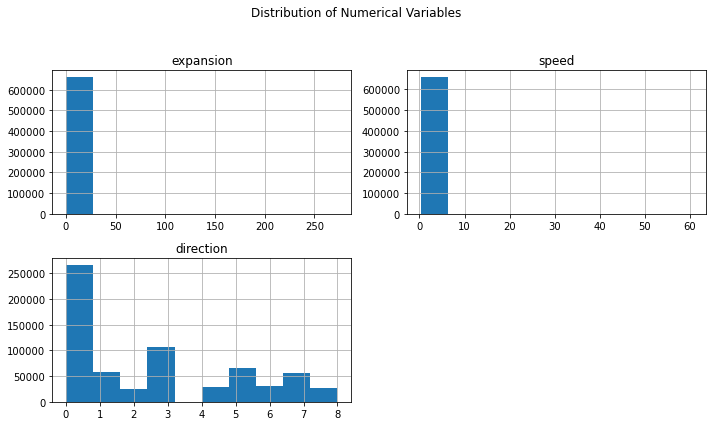

In [3]:
df[['expansion', 'speed', 'direction']].hist(bins=10, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [4]:
df.columns

Index(['Unnamed: 0', 'start_date', 'fire_ID', 'lat', 'lon', 'size',
       'perimeter', 'start_DOY', 'end_date', 'end_DOY', 'duration',
       'expansion', 'fire_line', 'speed', 'direction', 'direction_s',
       'landcover', 'landcover_s', 'tile_ID', 'geometry'],
      dtype='object')

#### Correlation Plots

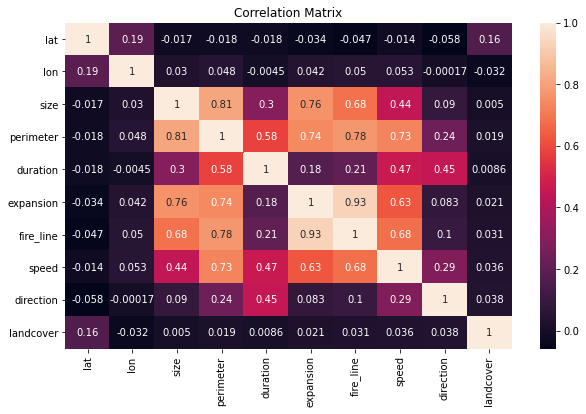

In [5]:
main_cols = df[['lat', 'lon', 'size', 'perimeter', 'duration',
       'expansion', 'fire_line', 'speed', 'direction', 'landcover']]

correlation_matrix = main_cols.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

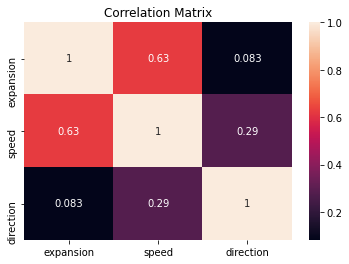

In [6]:
correlation_matrix = df[['expansion', 'speed', 'direction']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Focusing on direction


In [7]:
df['direction_s'].value_counts()

none         266863
east         107330
south         65262
north         57172
west          55407
southwest     30146
southeast     27994
northwest     26682
northeast     25674
Name: direction_s, dtype: int64

<AxesSubplot:title={'center':'Direction of Fires'}, ylabel='direction_s'>

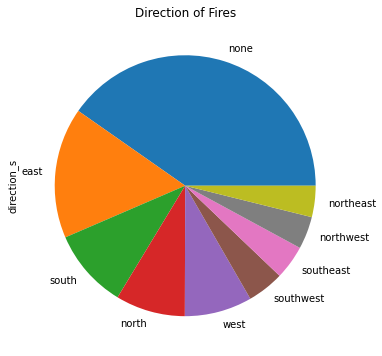

In [8]:
plt.figure(figsize = (10,6))
df['direction_s'].value_counts().plot(kind='pie', title="Direction of Fires")

#### Focusing on Speed

In [9]:
max(df['speed']), min(df['speed'])

(60.53, 0.25)

In [10]:
start = 0.25
end = 60.53
num_points = 10

step = (end - start) / (num_points - 1)
bins = np.linspace(start, end, num_points)
names = ['0.25 - 6.948', '6.948 - 13.646', '13.646 - 20.343', '20.343 - 27.041', '27.041 - 33.739',  
        '33.739 - 40.437','40.437 - 47.134', '47.134 - 53.832', '53.832 - 60.53']

plt.figure(figsize = (10,6))
df['speed_bins'] = pd.cut(df['speed'], bins, labels=names)
df['speed_bins'].value_counts()

0.25 - 6.948       661576
6.948 - 13.646        791
13.646 - 20.343        48
20.343 - 27.041        12
27.041 - 33.739         1
33.739 - 40.437         1
47.134 - 53.832         1
53.832 - 60.53          1
40.437 - 47.134         0
Name: speed_bins, dtype: int64

<Figure size 720x432 with 0 Axes>

#### Looking specifically at the values in the smallest bin

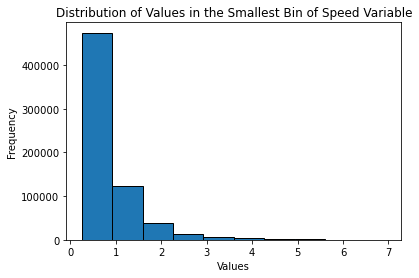

In [12]:
bin_start = 0.25
bin_end = 6.948

filtered_data = np.array(df['speed'])[(np.array(df['speed']) >= bin_start) & (np.array(df['speed']) <= bin_end)]

plt.hist(filtered_data, bins=10, range=(bin_start, bin_end), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in the Smallest Bin of Speed Variable')
plt.show()


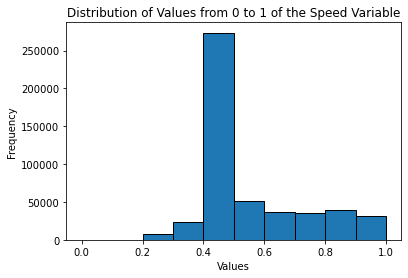

In [20]:
# Looking even closer at the smallest values
bin_start = 0
bin_end = 1

filtered_data = np.array(df['speed'])[(np.array(df['speed']) >= bin_start) & (np.array(df['speed']) <= bin_end)]

plt.hist(filtered_data, bins=10, range=(bin_start, bin_end), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values from 0 to 1 of the Speed Variable')
plt.show()

Text(0, 0.5, 'Perimeter')

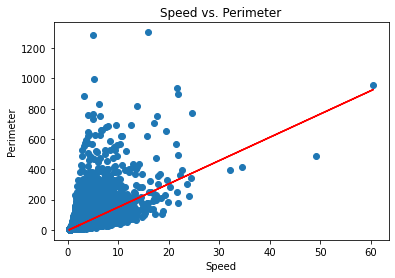

In [57]:
a, b = np.polyfit(df['speed'], df['perimeter'], 1)
plt.scatter(df['speed'], df['perimeter'])
plt.plot(df['speed'], a * df['speed'] + b, color='red')
plt.title("Speed vs. Perimeter")
plt.xlabel("Speed")
plt.ylabel("Perimeter")

Text(0, 0.5, 'Fire Line')

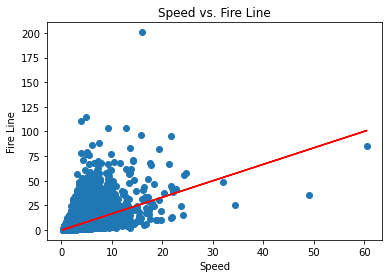

In [58]:
a, b = np.polyfit(df['speed'], df['fire_line'], 1)
plt.scatter(df['speed'], df['fire_line'])
plt.plot(df['speed'], a * df['speed'] + b, color='red')
plt.title("Speed vs. Fire Line")
plt.xlabel("Speed")
plt.ylabel("Fire Line")

Text(0, 0.5, 'Expansion')

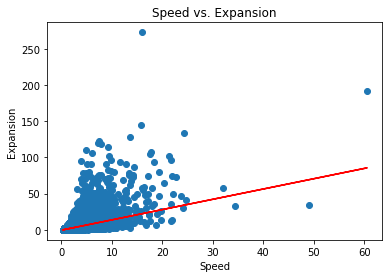

In [59]:
a, b = np.polyfit(df['speed'], df['expansion'], 1)
plt.scatter(df['speed'], df['expansion'])
plt.plot(df['speed'], a * df['speed'] + b, color='red')
plt.title("Speed vs. Expansion")
plt.xlabel("Speed")
plt.ylabel("Expansion")

#### Focusing on Expansion

In [60]:
df['expansion'].value_counts()

0.21     218781
0.43      64439
0.64      24341
0.14      17097
0.86      15146
          ...  
17.51         1
9.52          1
15.33         1
20.91         1
20.23         1
Name: expansion, Length: 2152, dtype: int64

In [61]:
min(df['expansion']), max(df['expansion'])

(0.03, 273.13)

In [75]:
start = 0.03
end = 273.13
num_points = 10

step = (end - start) / (num_points - 1)
bins = np.linspace(start, end, num_points)
names = ['0.030 - 30.374', '30.374 - 60.719', '60.719 - 91.063', '91.063 - 121.408', '121.408 - 151.752',  
        '151.752 - 182.097','182.097 - 212.441,', '212.441, - 242.786', '242.786 - 273.1303']

plt.figure(figsize = (10,6))
df['expansion_bins'] = pd.cut(df['expansion'], bins, labels=names)
df['expansion_bins'].value_counts()

0.030 - 30.374        662250
30.374 - 60.719          211
60.719 - 91.063           40
91.063 - 121.408          18
121.408 - 151.752          4
182.097 - 212.441,         1
242.786 - 273.1303         1
151.752 - 182.097          0
212.441, - 242.786         0
Name: expansion_bins, dtype: int64

<Figure size 720x432 with 0 Axes>

#### Looking at the values in the smallest bin

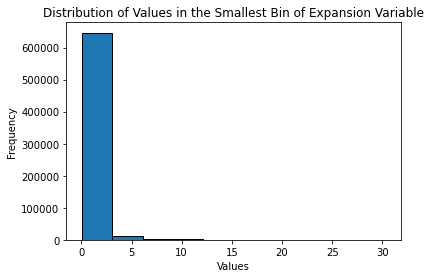

In [14]:
bin_start = 0.030
bin_end = 30.374

filtered_data = np.array(df['expansion'])[(np.array(df['expansion']) >= bin_start) & (np.array(df['expansion']) <= bin_end)]

plt.hist(filtered_data, bins=10, range=(bin_start, bin_end), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in the Smallest Bin of Expansion Variable')
plt.show()

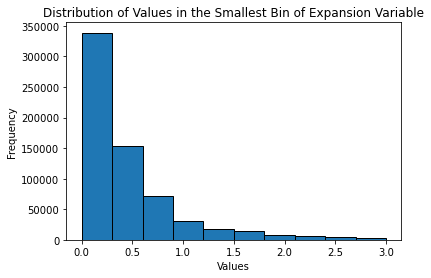

In [21]:
# looking even closer at the smallest values
bin_start = 0.0
bin_end = 3.0

filtered_data = np.array(df['expansion'])[(np.array(df['expansion']) >= bin_start) & (np.array(df['expansion']) <= bin_end)]

plt.hist(filtered_data, bins=10, range=(bin_start, bin_end), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in the Smallest Bin of Expansion Variable')
plt.show()

Text(0, 0.5, 'Perimeter')

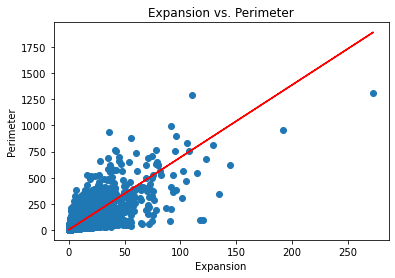

In [80]:
a, b = np.polyfit(df['expansion'], df['perimeter'], 1)
plt.scatter(df['expansion'], df['perimeter'])
plt.plot(df['expansion'], a * df['expansion'] + b, color='red')
plt.title("Expansion vs. Perimeter")
plt.xlabel("Expansion")
plt.ylabel("Perimeter")

Text(0, 0.5, 'Size')

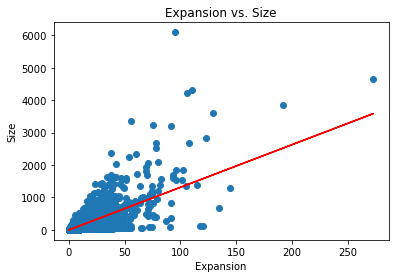

In [81]:
a, b = np.polyfit(df['expansion'], df['size'], 1)
plt.scatter(df['expansion'], df['size'])
plt.plot(df['expansion'], a * df['expansion'] + b, color='red')
plt.title("Expansion vs. Size")
plt.xlabel("Expansion")
plt.ylabel("Size")

Text(0, 0.5, 'Fire Line')

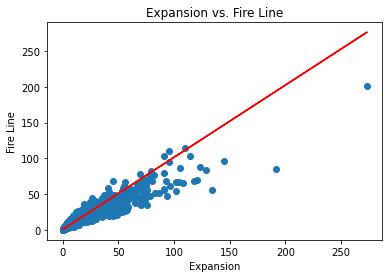

In [82]:
a, b = np.polyfit(df['expansion'], df['fire_line'], 1)
plt.scatter(df['expansion'], df['fire_line'])
plt.plot(df['expansion'], a * df['expansion'] + b, color='red')
plt.title("Expansion vs. Fire Line")
plt.xlabel("Expansion")
plt.ylabel("Fire Line")

 0.74 perimeter, 0.76, size, 0.93 fire line, 0.63 speed